#### 【 공공데이터 분석 - 온도데이터 】
- 데이터 : 기상청 사이트

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
## 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [243]:
## 데이터 준비
DATA_FILE = '../data/대구_온도_2000_20251109.csv'

daeguDF = pd.read_csv(DATA_FILE, skiprows=7)
daeguDF.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2000-01-01,143,4.7,0.0,8.5
1,\t2000-01-02,143,6.5,3.1,11.5
2,\t2000-01-03,143,2.9,0.0,6.8
3,\t2000-01-04,143,2.3,-2.4,7.5
4,\t2000-01-05,143,4.9,-0.9,9.4


[2] 데이터 확인 <hr>

In [244]:
## 요약 정보 확인
daeguDF.info()

## => 날짜컬럼 앞부분 '\t'공백 제거
## => 지점 컬럼 대구코드값 불필요한 컬럼 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9445 entries, 0 to 9444
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       9445 non-null   object 
 1   지점       9445 non-null   int64  
 2   평균기온(℃)  9444 non-null   float64
 3   최저기온(℃)  9445 non-null   float64
 4   최고기온(℃)  9443 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 369.1+ KB


[3] 기본 전처리 => 불피요 컬럼과 데이터 삭제 <hr>

In [245]:
## 지점 컬럼 대구코드값 불필요한 컬럼 제거  : drop(axis=1 또는 'columns')
#daeguDF.drop('지점', axis=1)
daeguDF = daeguDF.drop(columns='지점')

In [246]:
## 날짜 컬럼에 앞에 붙은'\t'제거 => 날짜 컬럼 타입 object로 str
## 접근자 str사용
daeguDF['날짜'] = daeguDF['날짜'].str.strip()

In [247]:
daeguDF.head(3)

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2000-01-01,4.7,0.0,8.5
1,2000-01-02,6.5,3.1,11.5
2,2000-01-03,2.9,0.0,6.8


[3] 세부 전처리 <hr>
- 결측치/중복값/이상치

In [248]:
## ----------------------------
## 결측치 체크
## ----------------------------
daeguDF.isna().sum()

날짜         0
평균기온(℃)    1
최저기온(℃)    0
최고기온(℃)    2
dtype: int64

In [249]:
# 결측치 존재 행 추출 => 필터링
msDF = daeguDF[daeguDF.isna().any(axis=1)]
msDF

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
5021,2013-09-30,NaN,20.1,NaN
8817,2024-02-21,5.1,3.6,NaN


In [250]:
## 데이터의 특성 즉, 기온 무작위성 X => 같은 컬럼의 값들이 서로 연결성
## 삭제하지 않고 채우기 => 이전/이후값들의 평균값으로 채우기
for idx in msDF.index:
    print(idx)
    cols = daeguDF.iloc[idx][daeguDF.iloc[idx].isna()].index

    ## 결측치 존재 행의 앞/뒤 3개행 선택 => 평균 : {컬럼명:평균값,..}
    fill_values = daeguDF[cols].iloc[idx-1:idx+2].mean(numeric_only=True).to_dict()
    daeguDF.iloc[idx] = daeguDF.iloc[idx].fillna(fill_values)

## 결측치 대체 확인
daeguDF.isna().sum()

5021
8817


날짜         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

In [251]:
## any() : 행/열방향으로 원소가 1개이상 True면 True
## all() : 행/열방향으로 원소가 모두 True면 True
## ★ 주의 ★
## -> 행단위일 경우 axis=1 : 행을 구성하는 모든 원소 즉, 모든 컬럼값을 확인
## -> 열단위일 경우 axis=0 : 열을 구성하는 모든 원소 즉, 모든 행의 값들 확인
daeguDF.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
9440    False
9441    False
9442    False
9443    False
9444    False
Length: 9445, dtype: bool

In [252]:
## ---------------------------------------------
## 중복값 체크 : 기온 데이터는 중복 발생 가능. 유지
## ---------------------------------------------
print(daeguDF.columns)
## 20000101 ~ 20251109
daeguDF[daeguDF.duplicated(subset=daeguDF.columns[1:], keep=False)].sort_values(by=['평균기온(℃)'])

Index(['날짜', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')


,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
1839,2005-01-13,-1.2,-3.9,2.5
5452,2014-12-05,-1.2,-3.9,2.5
2239,2006-02-17,-1.0,-3.7,2.7
9185,2025-02-23,-1.0,-3.7,2.7
6965,2019-01-26,-0.3,-3.5,4.6
...,...,...,...,...
3853,2010-07-20,29.1,24.8,34.2
4967,2013-08-07,30.0,23.8,36.2
2001,2005-06-24,30.0,23.8,36.2
4939,2013-07-10,30.7,26.2,35.9


In [253]:
daeguDF.iloc[:, 1:].duplicated().sum()

np.int64(64)

In [254]:
## 이상치 체크
import sys
sys.path.append(r'C:\Users\KDT\Desktop\KDT_10SL\EX_DATA_ANALYSYS\Utils')
import datautil as du

## 수치컬럼의 이상치 검사
numeric_cols = daeguDF.select_dtypes(include='number')
du.get_outlier_records(daeguDF, numeric_cols)
#du.get_outlier_records(daeguDF, daeguDF.columns[1:])

[]

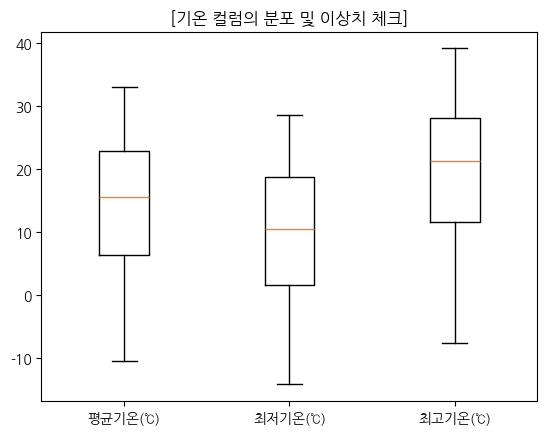

In [255]:
## 컬럼별 이상치 Boxplot 체크
plt.boxplot(daeguDF[daeguDF.columns[1:]])
plt.title("[기온 컬럼의 분포 및 이상치 체크]")
plt.xticks([1,2,3], daeguDF.columns[1:])
plt.show()

[4] 탐색적분석(EDA)<hr>

In [256]:
## 날짜 컬럼 : object ==> str이지만 날짜를 의미 : datetime64[ns]
daeguDF.날짜 = pd.to_datetime(daeguDF.날짜)
print(f' {daeguDF.날짜[0]} / {type(daeguDF.날짜[0])}')

## 타입 체크
daeguDF.info()

 2000-01-01 00:00:00 / <class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9445 entries, 0 to 9444
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       9445 non-null   datetime64[ns]
 1   평균기온(℃)  9445 non-null   float64       
 2   최저기온(℃)  9445 non-null   float64       
 3   최고기온(℃)  9445 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 295.3 KB


In [257]:
## ----------------------------------------------------------------
## 날짜 컬럼 일단위 ==> 주기 (주 W, 월 M, 분기 Q, 년도 Y)
## ----------------------------------------------------------------
## Period 배열 만들기
pr_m = pd.period_range( start=daeguDF['날짜'].iloc[0],          # 날짜 범위의 시작
                        end=daeguDF['날짜'].iloc[-1],           # 날짜 범위의 끝
                        freq='Y')                               # 주기설정

print(pr_m, pr_m.shape, range(1, pr_m.shape[0]+1))

daeguDF['날짜'] = pd.to_datetime(daeguDF['날짜'])

PeriodIndex(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
             '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
             '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
             '2024', '2025'],
            dtype='period[Y-DEC]') (26,) range(1, 27)


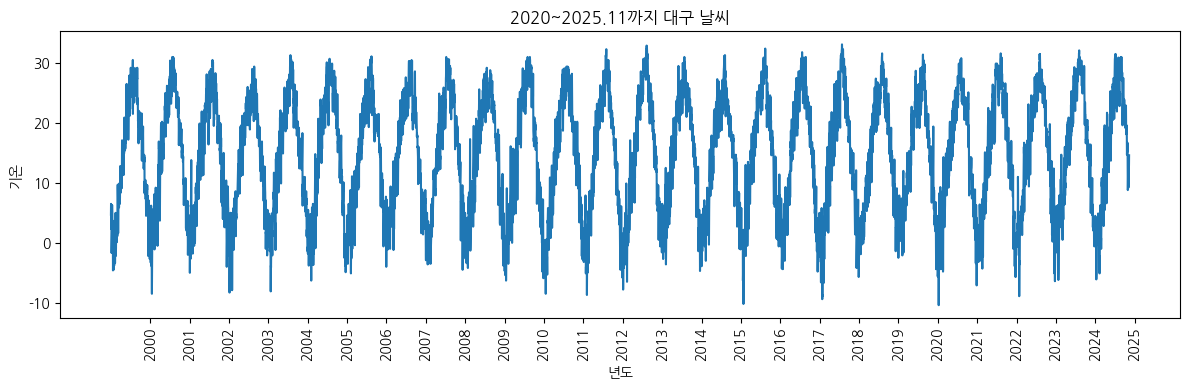

In [258]:
## 전체적인 대구시의 2000.1.1 ~ 2025.11.9까지 기온변화
## => 시간에 따른 흐름 : 선그래프
## => X축 : 날짜    Y축 : 기온 평균/최저/최고
plt.figure(figsize=(12,4))
plt.plot(daeguDF['날짜'], daeguDF['평균기온(℃)'])
plt.ylabel('기온')
plt.xlabel('년도')
plt.xticks(pr_m, pr_m, rotation=90)
plt.title('2020~2025.11까지 대구 날씨')
plt.tight_layout()
plt.show()

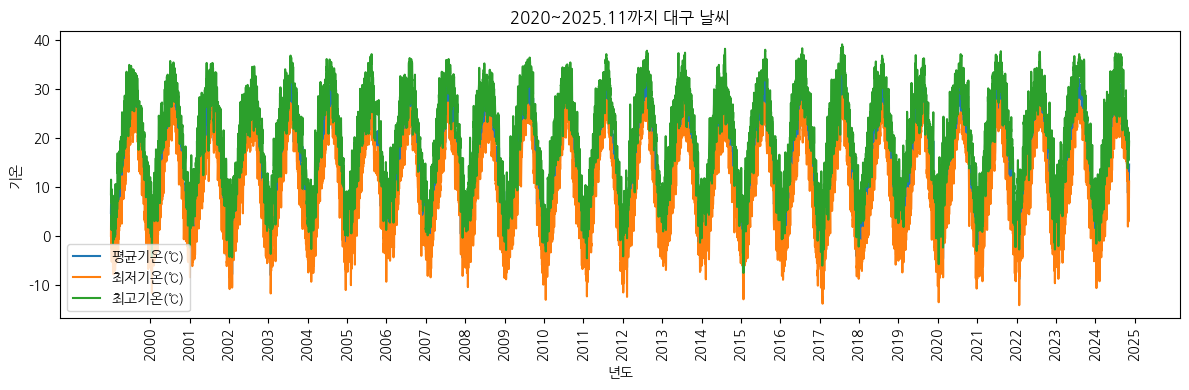

In [259]:
## [문제] 2020~2025년도 최고온도/최저온도/평균온도 변화 시각화
plt.figure(figsize=(12,4))
plt.plot(daeguDF['날짜'], daeguDF['평균기온(℃)'])
plt.plot(daeguDF['날짜'], daeguDF['최저기온(℃)'])
plt.plot(daeguDF['날짜'], daeguDF['최고기온(℃)'])
plt.ylabel('기온')
plt.xlabel('년도')
plt.xticks(pr_m, pr_m, rotation=90)
plt.title('2020~2025.11까지 대구 날씨')
plt.tight_layout()
plt.legend(['평균기온(℃)','최저기온(℃)','최고기온(℃)'])
plt.show()


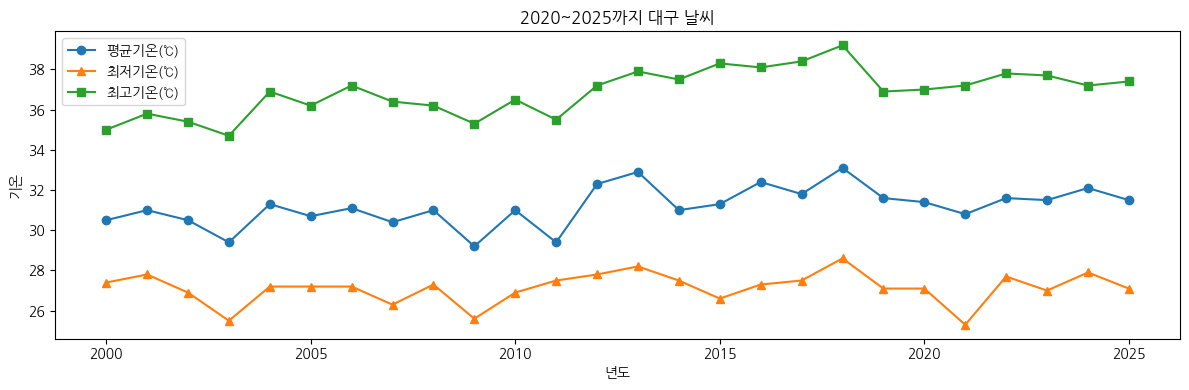

In [260]:
daeguDF['year'] = daeguDF['날짜'].dt.year
daeguDF

d_max = daeguDF.groupby(['year']).max(numeric_only=True)
d_max

## 년도 별로 가장 최고온도/ 최저온도/ 평균온도 값 구하기
plt.figure(figsize=(12,4))
plt.plot(d_max.index, d_max['평균기온(℃)'], '-o')
plt.plot(d_max.index, d_max['최저기온(℃)'], '-^')
plt.plot(d_max.index, d_max['최고기온(℃)'], '-s')
plt.ylabel('기온')
plt.xlabel('년도')
plt.title('2020~2025까지 대구 날씨')
plt.tight_layout()
plt.legend(['평균기온(℃)','최저기온(℃)','최고기온(℃)'])
plt.show()

### 교수님 답

In [261]:
daeguDF2 = daeguDF.copy()

## dt 접근자 => 년, 월, 일 추출
daeguDF2['년'] = daeguDF2['날짜'].dt.year

## => 그룹화
func_dict = dict(zip(daeguDF2.columns[1:],['mean','min','max']))

resultDF = daeguDF2[daeguDF2.columns[1:]].groupby(['년']).agg(func_dict)
resultDF.head(2)

,평균기온(℃),최저기온(℃),최고기온(℃)
년,,,
2000,14.287432,-7.9,35.0
2001,14.889863,-11.7,35.8


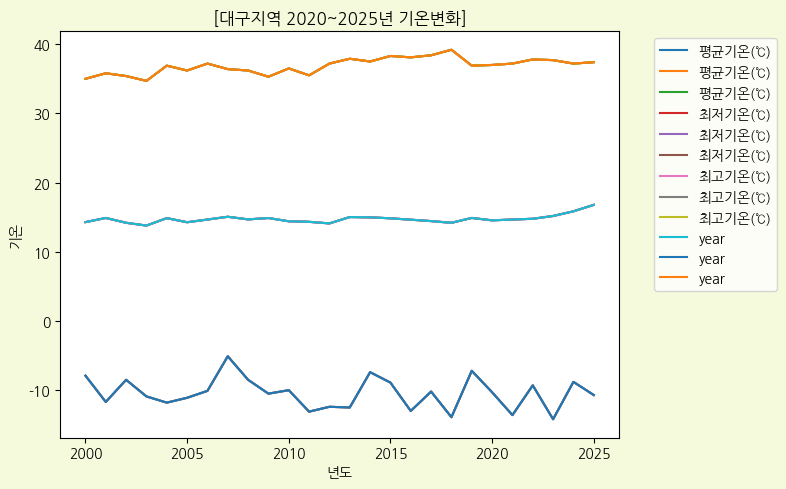

In [262]:
plt.figure(figsize=(8,5), facecolor='#F6FADC')

for col in daeguDF.columns[1:]:
    colDF = resultDF.loc[:col]
    plt.plot(colDF.index, colDF, label=f'{col}')

plt.legend(bbox_to_anchor=(1.05,1.))
plt.title("[대구지역 2020~2025년 기온변화]")
plt.xlabel("년도")
plt.ylabel('기온')
plt.tight_layout()
plt.show()

In [263]:
## [과제 ] 여름이 길어지고 겨울이 짧아짐 => 25도이상인 일수